# Modelos con sobredispersión (Fallas en rollos de tejido)

(Hinde y Demetrio (1998)) En estos datos la variable de respuesta es el número de fallas en rollos de tejido y la variable explicativa es la longitud de los rollos. El objetivo principal del análisis es identificar si existe una asociación entre el número de fallas en los rollos y la longitud de los mismos.

In [57]:
rm(list=ls())
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")
library(sqldf)
library(numDeriv)
library(Rfast)
source("macros.txt")
source("test.txt")

In [58]:
#Lectura de los datos
fallas<-c(6,4,17,9,14,8,5,7,7,7,6,8,28,4,10,4,8,9,23,9,6,1,9,4,9,14,17,10,7,3,9,2)
longitud<-c(551,651,832,375,715,868,271,630,491,372,645,441,895,458,642,492,543,842,905,542,522,122,657,170,738,371,735,749,495,716,952,417)
tejido<-data.frame(fallas, longitud); head(tejido)

fallas,longitud
6,551
4,651
17,832
9,375
14,715
8,868



# A)
Ajuste MLGs poisson con funciones de enlace identidad, logaritmo natural y raiz cuadrada donde el número de fallas en los rollos de tejido es la variable respuesta y la longitud de los rollos es la variable explicativa. Use los criterios AIC y BIC para seleccionar el “mejor” modelo. Evalúe si hay indicios de la presencia de sobredispersión.

Considerando que el número de fallas es claramente un **conteo** y la distribución que más se ajusta la variable rta es la Poisson. A continuación se realiza el ajuste en referencia a las especificaciones A):

In [59]:
###################### Estimación del modelo ######################
fit11 <- glm(fallas ~ longitud, family=poisson(link="log"), data=tejido)
fit12 <- glm(fallas ~ longitud, family=poisson(link="identity"), data=tejido)
fit13 <- glm(fallas ~ longitud, family=poisson(link="sqrt"), data=tejido)

In [60]:
###################### Valores del AIC y BIC ######################
AIC(fit11,fit12,fit13)
BIC(fit11,fit12,fit13)

,df,AIC
fit11,2,189.0559
fit12,2,191.7486
fit13,2,190.2910


,df,BIC
fit11,2,191.9873
fit12,2,194.6801
fit13,2,193.2225


Según los anteriores AIC y BIC, se logra identificar que el mejor modelo está determinado por: el que tiene familia Poisson y función de enlace **log**.


In [61]:
###################### Resumen del modelo seleccionado ######################
summary(fit11)
gof_glm(fit11)


Call:
glm(formula = fallas ~ longitud, family = poisson(link = "log"), 
    data = tejido)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.74127  -1.13312  -0.03904   0.66179   3.07446  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.9717506  0.2124693   4.574 4.79e-06 ***
longitud    0.0019297  0.0003063   6.300 2.97e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 103.714  on 31  degrees of freedom
Residual deviance:  61.758  on 30  degrees of freedom
AIC: 189.06

Number of Fisher Scoring iterations: 4



  Family:  poisson 
    Link:  log 
                                                    Df    Value
Residual deviance                                   30  61.7577
Pearson's statistic                                 30  63.6580
Adjusted R-squared based on the residual deviance        0.3847
Adjusted R-squared based on the Pearson's statistic      0.4427
-2*log-Likelihood                                      185.0559
AIC                                                    189.0559
BIC                                                    191.9873




Se conoce que en el caso de la Poisson el $\phi$ es conocido y es 1. No obstante para conocer $\phi$ estimamos mediante:

$$\widehat{\phi}= \frac{D(y; \widehat{\mu})}{n-p}$$

$$\widetilde{\phi}= \frac{P(y; \widehat{\mu})}{n-p}$$

Donde estos valores son mas del doble, se esperaría que fuera cercano a 1, es decir que estamos en un indicio de sobredispersión. Veamos el envelope:

In [62]:
61.7577/30
63.6580/30

[1] 2.05859

[1] 2.121933

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


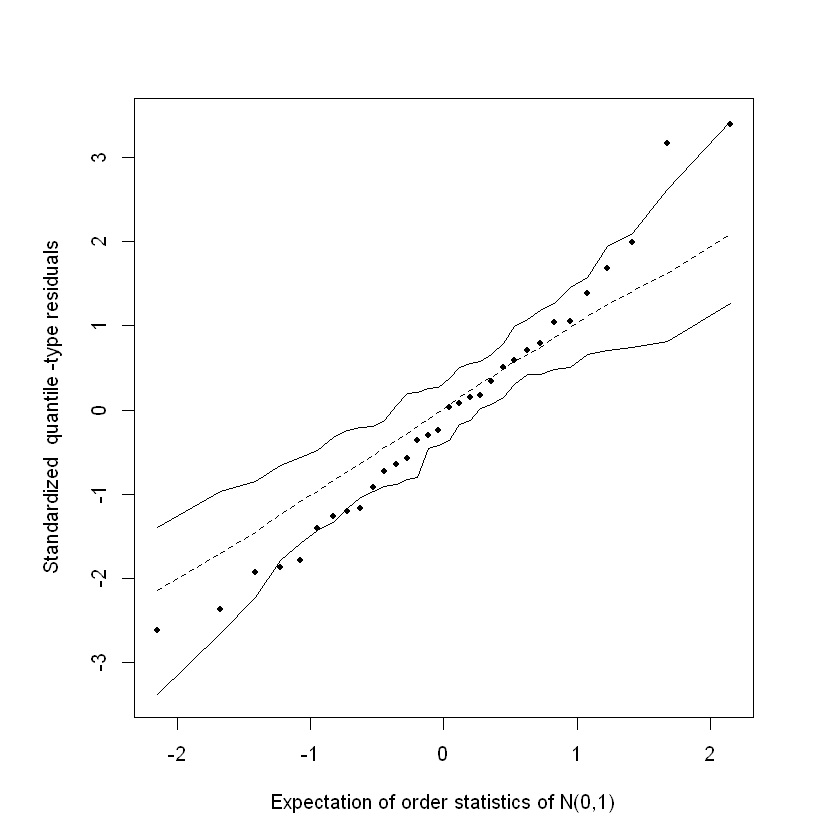

In [63]:
envelope_glm(fit11,rep=100)

* Al realizar el envelope en este ajuste se puede observar que el modelo **fit11 Poisson con enlace log** no es el más adecuado. Se puede observar que los residuos positivos se encuentran por encima del 0, estos residuos se encuentran por encima de la banda y nos residuos negativos debajo de la banda.

* Este patrón en el envelope y las estimaciones del desvio/gl y pearson/gl da indicios de algo que se le denomina **sobredispersión**.

* A continuación se realiza el ajuste a un moddelo por medio de la función **overglm**=sobredispersion igualmente mediante las fuinciones de enlace los, identidad y raiz cuadrada.

# B)

Ajuste modelos binomial negativa I, binomial negativa II y poisson-normal.inversa con funciones de enlace identidad, logaritmo natural y raiz cuadrada donde el número de fallas en los rollos de tejido es la variable respuesta y la longitud de
los rollos es la variable explicativa. Use los criterios AIC y BIC para seleccionar el “mejor” modelo. Compare con lo obtenido en (A), especialmente las magnitudes de los errores estándar. Comente.

### Forma de atacar el problema de sobredispersión por medio de la  BinomialNegativaI

In [64]:
###################### Estimación del modelo ######################
fit21 <-  overglm(fallas ~ longitud, family="nb1(log)", data=tejido)
fit22 <-  overglm(fallas ~ longitud, family="nb1(identity)", data=tejido)
fit23 <-  overglm(fallas ~ longitud, family="nb1(sqrt)", data=tejido)
AIC(fit21,fit22,fit23)
BIC(fit21,fit22,fit23)

Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi + 1):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi + 1):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi + 1):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi + 1):
"Se han producido NaNs"Warning message in log(mu * phi):
"Se han producido NaNs"Warning message in log(mu * phi + 1):
"Se han producido NaNs"



  Family:  Negative Binomial I 
Predictor:  1 + longitud 

 Object     Link -2*log-likelihood df     AIC 
  fit21      log          174.5537  3 180.5537
  fit22 identity          175.3380  3 181.3380
  fit23     sqrt          174.9630  3 180.9630


  Family:  Negative Binomial I 
Predictor:  1 + longitud 

 Object     Link -2*log-likelihood df     BIC 
  fit21      log          174.5537  3 184.9509
  fit22 identity          175.3380  3 185.7352
  fit23     sqrt          174.9630  3 185.3602


En la anterior salida se muestra los ajustes con sus respectivas funciones de enlace, BIC, AIC, etc. Donde se puede ver que la mejor opcion es el modelo con funcion de enlace *log*, Es decir fit21

* Aqui los grados de libertad son 3 puesto que en el modelo Poisson, $\phi$ era conocido y era $\phi=1$

### Forma de atacar el problema de sobredispersión por medio de la  BinomialNegativaII

In [65]:
fit31 <-  overglm(fallas ~ longitud, family="nb2(log)", data=tejido)
fit32 <-  overglm(fallas ~ longitud, family="nb2(identity)", data=tejido)
fit33 <-  overglm(fallas ~ longitud, family="nb2(sqrt)", data=tejido)
AIC(fit31,fit32,fit33)
BIC(fit31,fit32,fit33)



  Family:  Negative Binomial II 
Predictor:  1 + longitud 

 Object     Link -2*log-likelihood df     AIC 
  fit31      log          176.0436  3 182.0436
  fit32 identity          176.9957  3 182.9957
  fit33     sqrt          176.4584  3 182.4584


  Family:  Negative Binomial II 
Predictor:  1 + longitud 

 Object     Link -2*log-likelihood df     BIC 
  fit31      log          176.0436  3 186.4408
  fit32 identity          176.9957  3 187.3929
  fit33     sqrt          176.4584  3 186.8556


Aquí el mejor modelo es el binomial NegativoII enlace log

### Otra forma de atacar el problema a subdispersión es PoissonNormalInversa

In [66]:
fit41 <-  overglm(fallas ~ longitud, family="poig(log)", data=tejido)
fit42 <-  overglm(fallas ~ longitud, family="poig(identity)", data=tejido)
fit43 <-  overglm(fallas ~ longitud, family="poig(sqrt)", data=tejido)
AIC(fit41,fit42,fit43)
BIC(fit41,fit42,fit43)



  Family:  Poisson-Inverse.Gaussian 
Predictor:  1 + longitud 

 Object     Link -2*log-likelihood df     AIC 
  fit41      log          188.3449  3 194.3449
  fit42 identity          188.8230  3 194.8230
  fit43     sqrt          188.6536  3 194.6536


  Family:  Poisson-Inverse.Gaussian 
Predictor:  1 + longitud 

 Object     Link -2*log-likelihood df     BIC 
  fit41      log          188.3449  3 198.7421
  fit42 identity          188.8230  3 199.2202
  fit43     sqrt          188.6536  3 199.0508


Auí el mejor modelo es el PoissonNormalInverso enlace log.

---

Para poder determinar el mejor modelo, se realiza el AIC,BIC de las cuatro formas de subdispersión:

In [67]:
AIC(fit21,fit31,fit41)
BIC(fit21,fit31,fit41)


     Link:  log 
Predictor:  1 + longitud 

 Object                   Family -2*log-likelihood df     AIC 
  fit21      Negative Binomial I          174.5537  3 180.5537
  fit31     Negative Binomial II          176.0436  3 182.0436
  fit41 Poisson-Inverse.Gaussian          188.3449  3 194.3449

     Link:  log 
Predictor:  1 + longitud 

 Object                   Family -2*log-likelihood df     BIC 
  fit21      Negative Binomial I          174.5537  3 184.9509
  fit31     Negative Binomial II          176.0436  3 186.4408
  fit41 Poisson-Inverse.Gaussian          188.3449  3 198.7421


Finalmente se tiene que el mejor modelo es el que está determinadpo por Negative Binomial I con funcion de enlace log. veamos el ajuste:

In [68]:
summary(fit21)


Sample size:  32 
     Family:  Negative Binomial I
       Link:  log
 *************************************************************
            Estimate Std.Error z-value   Pr(>|z|)
(Intercept)  1.00147   0.27540 3.63640 0.00027647
longitud     0.00188   0.00042 4.52651 5.9966e-06

            Estimate Std.Error
Dispersion    0.1045    0.0534
 *************************************************************
                 -2*log-likelihood:  174.554 
                               AIC:  180.554 
                               BIC:  184.951 


En referencia a las estimaciones de los parámetros del modelo se puede decir que siguen siendo significativos, en el modelo *poisson* los parámetros son $(0.9717506, 0.0019297)$ y existen cambios sutanciales con respecto a los del modelo *Negative Binomial I* , no pobstante al estar presente la sobredispersión se especifica que se está subestimando con los errores estándar en el modelo Poisson los cuales son: (0.2124693, 0.0003063), es decir que con el nuevo ajuste *Negative Binomial I* se esperan que sean mayores. En realidad sucede. 



# C) 

Use los criterios AIC y BIC para comparar los modelos seleccionados en (A) y (B). Cual de ellos parece describir mejor los datos?

In [69]:
BIC(fit11, fit21)
AIC(fit11, fit21)

,df,BIC
fit11,2,191.9873
fit21,3,NA


,df,AIC
fit11,2,189.0559
fit21,3,180.5537


En correspondencia a los valores del AIC, BIC del los dos modelos, se afirma que el mejor modelo está derterminado por *Negative Binomial I* con función de enlace log.


# D) 

Use el test de Wald y el test de razón de verosimilitudes para evaluar, al nivel de significancia aproximado de 5%, si el número de fallas en los rollos depende de la longitud de los mismos.

### Test Wald
Para contrastar la prueba se tiene el siguiente sistema de hipótesis:

$$H_{0}: \beta_2=0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_2 \neq 0 $$

donde 

$$ \xi _{W} = (\hat{\beta_2}  - \beta_2^{0})' [\hat{Var}(\hat{\beta_2})]^{-1}(\hat{\beta_2}  - \beta_2^{0})$$

In [70]:
fit <-  overglm(fallas ~ 1, family="nb1(log)", data=tejido)
anova_glm(fit21,fit,test="wald") #test de wald


  Wald test 

 Model 1:  fallas ~ longitud 
 Model 2:  fallas ~ 1 

   Chi    Df   Pr(>Chi)    
  20.489   1  5.997e-06 ***


Consideradndo las anteriores salidas se rechaza $H_0$ a un nivel de significancia APROXIMADO del 100$ \alpha\%$ puesto que $\xi _{W}=20.489 >\chi^2(1)$ Afirmandose que $\beta_2$ es significativo en el modelo. Es decír **el número de fallas en los rollos SI depende de la longitud de los mismos.**

### Test Razón de verosimilitudes

In [71]:
anova_glm(fit21,fit, test = "lrt")  


  Likelihood-ratio test 

 Model 1:  fallas ~ longitud 
 Model 2:  fallas ~ 1 

   Chi    Df   Pr(>Chi)    
  16.508   1  4.844e-05 ***


Consideradndo las anteriores salidas se rechaza $H_0$ a un nivel de significancia APROXIMADO del 100$ \alpha\%$ puesto que $\xi _{RV}=16.508 >\chi^2(1)$ Afirmandose que $\beta_2$ es significativo en el modelo. Es decír **el número de fallas en los rollos SI depende de la longitud de los mismos.**

# E) 

Realice el análisis de diagnóstico al modelo. Comente.

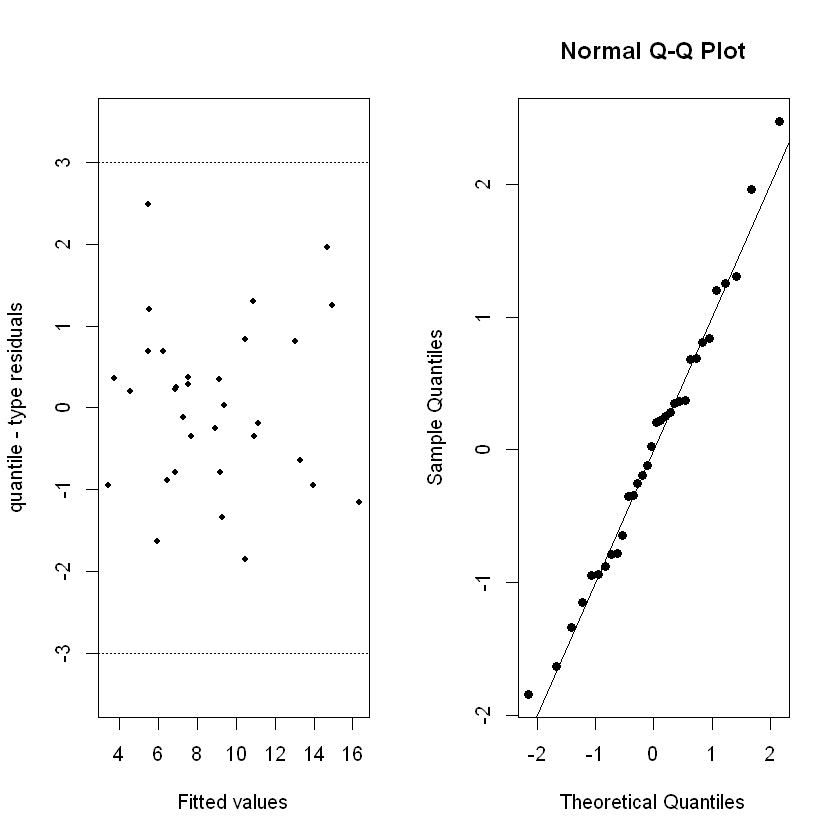

In [72]:
################################# Diagnóstico del modelo seleccionado #################################
###################### Análisis de residuos ######################
par(mfrow=c(1,2))
res <- residuals(fit21,plot=TRUE,type="quantile",identify=1)
qqnorm(res,pch=16)
abline(0,1)

Para este caso no se tiene el envelope, sin embargo se tienen los residuos cuantil y estos deben distribuir normal(0,1) cuando son correctos. En los que se puede ver que siguen el patron de linea recta.

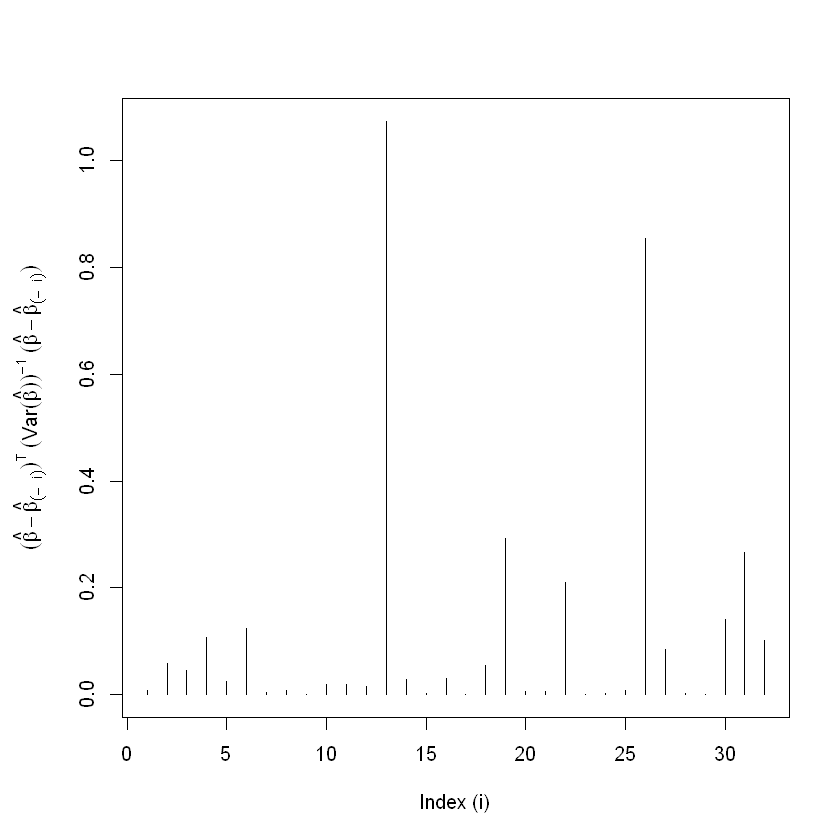

In [73]:
###################### Análisis de sensibilidad ######################
CookDistance(fit21,plot=TRUE,out=FALSE,identify=1)

Entre las observaciones que mayor distancia de Cook tienen están: (13,26,19,31,22).

# F) 
Interprete las estimaciones de los parámetros del modelo excepto el intercepto.

## Interpretación
 
 $$	log(\mu_k)=\eta_k= \beta_1 + \beta_2 Longitud_{k}$$
 
Considerando que se desea comparar la longitud de los rollos, se compara con respecto a dos rollos, donde uno de ellos tiene $\delta$ unidades mayor que el otro se describe el número esperado de fallas como:

 $$	\mu_k = \beta_1 + \beta_2 (x_o + \delta)$$
 
Sacando exponencial para comparar los dos estudiantes y de esta manera determinar el numero esperado de fallas, se tiene:
  
 $$\mu_k= \frac{ exp[ \beta_1 + \beta_2 (x_o + \delta) ]}{exp[ \beta_1 + \beta_2 x_o ]} = exp(\delta \beta_2) $$
 
 De lo anterior se tiene:
 
  $$exp(\delta \hat{\beta_2}) = exp(  0.00188)=1.001882$$
 
* Por cada unidad adicional en la longitud de los rollos, el número esperado de fallas es $1.8\%$ mayor que elrollo de menor longitud.
    